Content:
Trade flows at the year - exporter - importer - product level.
Products in Harmonized System 6-digit nomenclature.
Values in thousand USD and quantities in metric tons.

List of Variables:
t: year
i: exporter
j: importer
k: product
v: value
q: quantity

Content of BACI_HS92_Y2023_V202501.csv:
Trade flows at the year - exporter - importer - product level.
Products in Harmonized System 6-digit nomenclature.
Values in thousand USD and quantities in metric tons.

List of Variables by columnes:
t: year
i: exporter
j: importer
k: product
v: value
q: quantity

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Leer el archivo CSV sin cabecera, asegurando que los tipos sean correctos
#df = pd.read_csv('BACI_HS92_Y2023_V202501.csv', sep=',', header=0)
df = pd.read_csv('data_simple.csv', sep=',', header=0)

display(df)

,t,i,j,k,v,q
0,2023,4,20,200290,8.013,5.830
1,2023,4,24,252220,21.928,64.909
2,2023,4,24,293629,0.128,0.004
3,2023,4,24,330300,0.738,0.296
4,2023,4,24,330499,0.387,0.048
...,...,...,...,...,...,...
578368,2023,56,214,680299,0.422,0.050
578369,2023,56,214,680422,4.920,0.650
578370,2023,56,214,680510,0.145,0.002
578371,2023,56,214,680990,7.136,4.000


Índices matriz inicial:

t, 1ª columna, año

i, 2ª columna, país exportador

j, 3ª columna, país importador

k, 4ª columna, producto

v, 5ª columna, volumen de producto intercambiado

q, 6ª columna, valor monetario de la transacción

In [3]:
# 2. Agrupar los productos, k, para quedarse con los primeros 4 dígitos.
df['k'] = df['k'].apply(lambda x: str(x)[:4])  # Convertir 'k' a string antes de aplicar el slicing

# 3. Sustituir NaN por 0 en las columnas 'v' y 'q'.
# Imprimir para ver si hay valores NaN en las columnas 'v' y 'q'.
if df[['v', 'q']].isna().any().any():
    print("Índices de valores NaN en 'v':", df[df['v'].isna()].index.tolist())
    print("Índices de valores NaN en 'q':", df[df['q'].isna()].index.tolist())
df[['v', 'q']] = df[['v', 'q']].fillna(0)

# Convertir las columnas 'v' y 'q' a tipo numérico para realizar las operaciones de suma
df['v'] = pd.to_numeric(df['v'], errors='coerce')
df['q'] = pd.to_numeric(df['q'], errors='coerce')

# 5. Agrupar por la columna 'k' y sumar las columnas 'v' y 'q', 
# quedándose un valor de v y q para cada valor de 'k'.
agrupado = df.groupby(['t', 'i', 'k'], as_index=False).agg({
    'v': 'sum',  # Sumar los valores de 'v'
    'q': 'sum'   # Sumar los valores de 'q'
})

print(agrupado)

# # ¿HACE FALTA?
# # 6. Seleccionar las columnas 1, 2, 4, 5 y 6, que son las que nos interesan.
# resultado = agrupado[['t', 'i', 'k', 'v', 'q']]
# print(resultado)

Índices de valores NaN en 'v': []
Índices de valores NaN en 'q': [27, 32, 52, 76, 86, 87, 93, 99, 102, 104, 175, 188, 199, 201, 204, 246, 247, 250, 251, 261, 272, 285, 286, 287, 310, 312, 323, 324, 326, 331, 356, 389, 393, 431, 438, 441, 442, 444, 471, 475, 480, 510, 517, 525, 532, 534, 539, 541, 545, 546, 547, 549, 556, 600, 601, 602, 603, 618, 635, 648, 649, 662, 664, 668, 676, 724, 750, 757, 782, 788, 791, 794, 795, 797, 798, 803, 815, 832, 842, 843, 851, 854, 858, 863, 873, 880, 884, 885, 886, 887, 905, 907, 917, 918, 919, 922, 923, 924, 929, 931, 932, 933, 934, 936, 937, 938, 939, 940, 941, 942, 943, 950, 953, 959, 960, 965, 967, 968, 972, 973, 976, 982, 983, 985, 991, 992, 994, 1005, 1009, 1013, 1014, 1019, 1025, 1026, 1027, 1028, 1030, 1031, 1032, 1033, 1034, 1045, 1055, 1056, 1057, 1058, 1060, 1064, 1065, 1070, 1073, 1074, 1075, 1081, 1090, 1094, 1095, 1098, 1102, 1103, 1104, 1105, 1107, 1112, 1114, 1116, 1117, 1118, 1119, 1122, 1131, 1133, 1139, 1143, 1144, 1146, 1147, 1152, 1

Balassa‐type “Revealed Comparative Advantage” (RCA) index

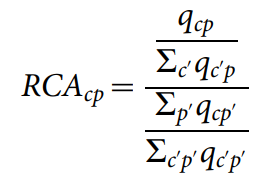

q_cp: quantity (e.g. exports) of product k by country i.

Divided by total quantity of product k across all countries.

Divided by total quantity of all products by country i.

Dividded by total quantity of all products across all countries.

El criterio del filtro no es cantidad exportada, sino valor de la cantidad exportada. Si un país regala productos, no afecta en su "economía".

In [5]:
# 6. Cálculos para RCA.
# # total quantity of each product across ALL countries
# world_product_sums = agrupado.groupby('k')['q'].sum()
# # total quantity of ALL products for each country
# country_sums = agrupado.groupby('i')['q'].sum()
# # total quantity of ALL products across ALL countries
# world_sum = agrupado['q'].sum()


# Crear una matriz vacía para almacenar los valores de RCA
countries = agrupado['i'].unique()
products = agrupado['k'].unique()
RCA_matrix = pd.DataFrame(index=countries, columns=products)

# Calcular RCA para cada combinación de país (i) y producto (k)
for i in countries:
    for k in products:
        # Filtrar los datos para el país y producto actuales
        q_ik = agrupado[(agrupado['i'] == i) & (agrupado['k'] == k)]['q'].sum()
        q_k = agrupado[agrupado['k'] == k]['q'].sum()
        q_i = agrupado[agrupado['i'] == i]['q'].sum()
        q_total = agrupado['q'].sum()
        
        # Calcular el RCA
        if q_k > 0 and q_i > 0:  # Evitar divisiones por cero
            RCA_matrix.loc[i, k] = (q_ik / q_k) / (q_i / q_total)
        else:
            RCA_matrix.loc[i, k] = np.nan

# Convertir la matriz a un formato numérico
RCA_matrix = RCA_matrix.apply(pd.to_numeric, errors='coerce')

# if df['RCA'].isna().any():
#     print("Hay valores vacíos en la columna 'RCA'.")

# # 7. Filtro para los valores de RCA; convertir a 1 o 0.
# df['RCA'] = df['RCA'].apply(lambda x: 1 if x >= 1 and not np.isnan(x) else 0)

# print(df['RCA'] )

In [6]:
# Use pivot_table to handle duplicate entries by aggregating with max
M = df.pivot_table(index='i', columns='k', values='RCA_matrix') #, fill_value=0

plt.imshow(M, aspect='auto')
plt.colorbar(label='RCA')
plt.xlabel('Product (k)')
plt.ylabel('Country (i)')
plt.title('M_cp')

KeyError: 'RCA_matrix'

In [ ]:
# 7. Exportar el resultado transpuesto a un archivo CSV
#resultado_transpuesto.to_csv('1intento.csv', header=False, index=False)
M.to_csv('1intento.csv', header=False, index=False)

print("El archivo '1intento.csv' se ha creado correctamente.")

El archivo '1intento.csv' se ha creado correctamente.
